In [ ]:
!pip install torchfunc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, datasets
import torchvision.models as models
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torch.utils.data import Dataset, Subset
import itertools
from torchvision.datasets import CIFAR10
from collections import defaultdict, deque
import random
from PIL import ImageFilter
import torchfunc 

In [ ]:
batch_size = 1024
valid_size=0.1
seed = 121

In [ ]:
def train(num_epochs,cnn,train_loader,valid_loader):
    epochs = []

    losses = []
    accs = []

    val_losses = []
    val_accs = []
    # Train the model
    total_step = len(train_loader)

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            
            # gives batch data, normalize x when iterate train_loader
           
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)


            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
  
        correct_val = 0
        total_val = 0
        correct = 0
        total = 0
        total_loss = 0
        total_val_loss = 0

        with torch.no_grad():
            for images, labels in train_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                total_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        with torch.no_grad():
            for images, labels in valid_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
        print()
        print('Epoch [{}/{}]\n Train Loss: {:.4f}, Train Accuracy: {:.4f}\n Val Loss: {:.4f}, Val Accuracy: {:.4f}' .format(epoch + 1, num_epochs, total_loss, correct/total, total_val_loss, correct_val/total_val ))
        print()
        epochs += [epoch+1]
        losses += [total_loss]
        accs += [correct/total]
        val_losses += [total_val_loss]
        val_accs += [correct_val/total_val]
    
    return (epochs,losses,accs,val_losses,val_accs)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
train_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
valid_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
test_loader = DataLoader(test_set, batch_size=batch_size,shuffle=True)

num_train = len(train_set)
indices = list(range(num_train))
split = int(np.floor(valid_size * num_train))
np.random.seed(seed)
np.random.shuffle(indices)
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = DataLoader(train_set, batch_size=batch_size, sampler=train_sampler)
valid_loader = DataLoader(valid_set, batch_size=batch_size, sampler=valid_sampler)

In [ ]:
num_classes = 10
num_epochs = 50
learning_rate = 0.05
momentum = 0.9
criterion = nn.CrossEntropyLoss()

# Training model from scratch

In [ ]:
model = models.resnet18(pretrained=False, progress=True).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
epochs,losses,accs,val_losses,val_accs = train(num_epochs,model,train_loader,valid_loader)

Epoch [1/50], Step [10/44], Loss: 1.9981
Epoch [1/50], Step [20/44], Loss: 1.8180
Epoch [1/50], Step [30/44], Loss: 1.5593
Epoch [1/50], Step [40/44], Loss: 1.3735

Epoch [1/50]
 Train Loss: 58.2676, Train Accuracy: 0.5195
 Val Loss: 7.0270, Val Accuracy: 0.4908

Epoch [2/50], Step [10/44], Loss: 1.4374
Epoch [2/50], Step [20/44], Loss: 1.2774
Epoch [2/50], Step [30/44], Loss: 1.2165
Epoch [2/50], Step [40/44], Loss: 1.2394

Epoch [2/50]
 Train Loss: 48.0280, Train Accuracy: 0.6068
 Val Loss: 6.2506, Val Accuracy: 0.5510

Epoch [3/50], Step [10/44], Loss: 1.0383
Epoch [3/50], Step [20/44], Loss: 1.1203
Epoch [3/50], Step [30/44], Loss: 1.1268
Epoch [3/50], Step [40/44], Loss: 1.0290

Epoch [3/50]
 Train Loss: 39.3582, Train Accuracy: 0.6827
 Val Loss: 5.7101, Val Accuracy: 0.5936

Epoch [4/50], Step [10/44], Loss: 0.9454
Epoch [4/50], Step [20/44], Loss: 0.8946
Epoch [4/50], Step [30/44], Loss: 0.8786
Epoch [4/50], Step [40/44], Loss: 0.9347

Epoch [4/50]
 Train Loss: 34.7737, Train Ac

In [ ]:
print(losses)
print()
print(accs)
print()
print(val_losses)
print()
print(val_accs)

[58.26762592792511, 48.02798247337341, 39.35822767019272, 34.7736993432045, 28.02007806301117, 21.387901425361633, 16.29192578792572, 14.101093083620071, 10.410520359873772, 8.052951589226723, 7.834390267729759, 5.65240666270256, 3.722005445510149, 3.8420663475990295, 3.2143242731690407, 3.5016536563634872, 2.20578670874238, 1.7372710518538952, 2.2331024669110775, 1.6974185314029455, 1.1100344620645046, 1.1609677337110043, 1.2119392985478044, 1.138365151360631, 1.166900584474206, 0.8856424884870648, 0.8746360223740339, 0.7101925974711776, 0.6719763604924083, 0.6686908947303891, 0.5061604809015989, 0.821623825468123, 0.7774110939353704, 0.6780603565275669, 0.4589845712762326, 0.5209174663759768, 0.363132334779948, 0.5229923231527209, 0.3312253765761852, 0.31010782322846353, 0.2168314012233168, 0.23583656968548894, 0.12666607787832618, 0.07000644080108032, 0.017548824325785972, 0.018834145193977747, 0.004479537430597702, 0.0031329840203397907, 0.0026909748376056086, 0.0024141017856891267

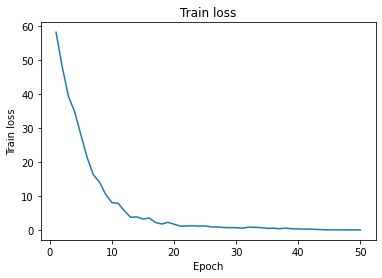

In [ ]:
plt.plot(np.array(epochs), np.array(losses))
plt.xlabel("Epoch") 
plt.ylabel("Train loss")
plt.title("Train loss")
plt.show()

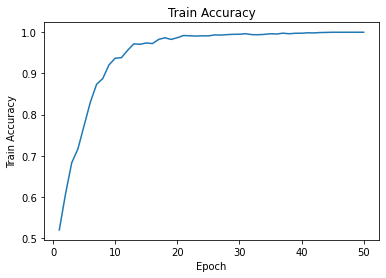

In [ ]:
plt.plot(np.array(epochs), np.array(accs))
plt.xlabel("Epoch") 
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy")
plt.show()

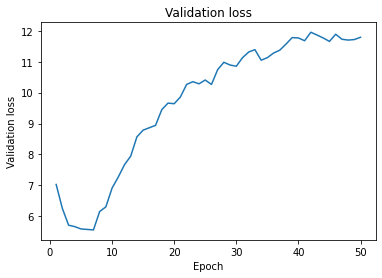

In [ ]:
plt.plot(np.array(epochs), np.array(val_losses))
plt.xlabel("Epoch") 
plt.ylabel("Validation loss")
plt.title("Validation loss")
plt.show()

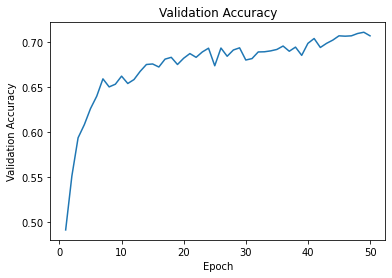

In [ ]:
plt.plot(np.array(epochs), np.array(val_accs))
plt.xlabel("Epoch") 
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy")
plt.show()

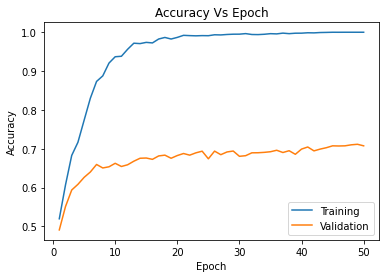

In [ ]:
plt.plot(np.array(epochs),np.array(accs),label = 'Training')
plt.plot(np.array(epochs),np.array(val_accs),label = 'Validation')
plt.xlabel("Epoch") 
plt.ylabel("Accuracy")
plt.title("Accuracy Vs Epoch")
plt.legend()
plt.show()

In [ ]:
total_loss = 0
total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Loss: {:.4f}, Test Accuracy: {:.4f}' .format(total_loss, correct/total))

Test Loss: 23.8507, Test Accuracy: 0.7015


# Using pre-trained model

Complete training

In [ ]:
model = models.resnet18(pretrained=True, progress=True).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
epochs,losses,accs,val_losses,val_accs = train(num_epochs,model,train_loader,valid_loader)

Epoch [1/50], Step [10/44], Loss: 1.8923
Epoch [1/50], Step [20/44], Loss: 1.6639
Epoch [1/50], Step [30/44], Loss: 1.4383
Epoch [1/50], Step [40/44], Loss: 1.1539

Epoch [1/50]
 Train Loss: 49.4461, Train Accuracy: 0.5932
 Val Loss: 5.8973, Val Accuracy: 0.5700

Epoch [2/50], Step [10/44], Loss: 1.0371
Epoch [2/50], Step [20/44], Loss: 0.8862
Epoch [2/50], Step [30/44], Loss: 0.8601
Epoch [2/50], Step [40/44], Loss: 0.8636

Epoch [2/50]
 Train Loss: 31.4280, Train Accuracy: 0.7529
 Val Loss: 4.0620, Val Accuracy: 0.7080

Epoch [3/50], Step [10/44], Loss: 0.6605
Epoch [3/50], Step [20/44], Loss: 0.6590
Epoch [3/50], Step [30/44], Loss: 0.6494
Epoch [3/50], Step [40/44], Loss: 0.6553

Epoch [3/50]
 Train Loss: 23.0457, Train Accuracy: 0.8232
 Val Loss: 3.5467, Val Accuracy: 0.7550

Epoch [4/50], Step [10/44], Loss: 0.5391
Epoch [4/50], Step [20/44], Loss: 0.5010
Epoch [4/50], Step [30/44], Loss: 0.5440
Epoch [4/50], Step [40/44], Loss: 0.4964

Epoch [4/50]
 Train Loss: 17.8323, Train Ac

In [ ]:
print(losses)
print()
print(accs)
print()
print(val_losses)
print()
print(val_accs)

[49.44608736038208, 31.42798262834549, 23.045659095048904, 17.832297831773758, 14.065132021903992, 11.566770106554031, 8.56600920855999, 5.817664436995983, 5.050056613981724, 3.995253562927246, 2.9395422004163265, 2.588701516389847, 2.3654820397496223, 1.8952958099544048, 1.4248062130063772, 1.145385731011629, 1.2717420710250735, 1.173609816469252, 1.3008222095668316, 1.1069318894296885, 0.7765452452003956, 0.5178350398782641, 0.5410272716544569, 0.626553853508085, 0.6327835032716393, 0.8354069073684514, 0.8881727391853929, 0.4789147013798356, 0.31774562946520746, 0.339618275873363, 0.2663873240817338, 0.27401616267161444, 0.27955348254181445, 0.4466410439927131, 0.3813921519322321, 0.3563117778394371, 0.5211796227376908, 0.3977049451787025, 0.4749033108819276, 0.43964618374593556, 0.2667105426080525, 0.2005408457480371, 0.22910983924521133, 0.11971225758315995, 0.09574898076243699, 0.07549372728681192, 0.15232917948742397, 0.04896915252902545, 0.06303197814850137, 0.014361110090248985

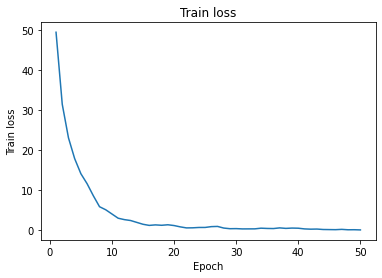

In [ ]:
plt.plot(np.array(epochs), np.array(losses))
plt.xlabel("Epoch") 
plt.ylabel("Train loss")
plt.title("Train loss")
plt.show()

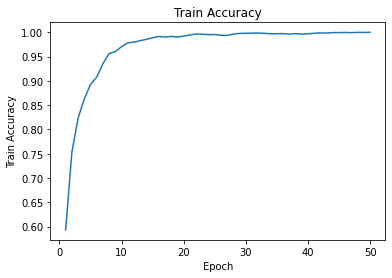

In [ ]:
plt.plot(np.array(epochs), np.array(accs))
plt.xlabel("Epoch") 
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy")
plt.show()

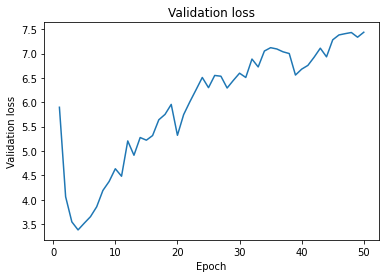

In [ ]:
plt.plot(np.array(epochs), np.array(val_losses))
plt.xlabel("Epoch") 
plt.ylabel("Validation loss")
plt.title("Validation loss")
plt.show()

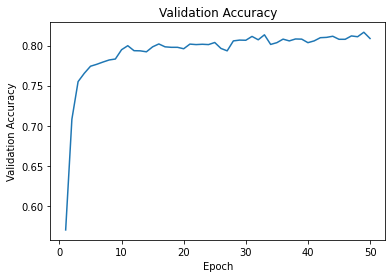

In [ ]:
plt.plot(np.array(epochs), np.array(val_accs))
plt.xlabel("Epoch") 
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy")
plt.show()

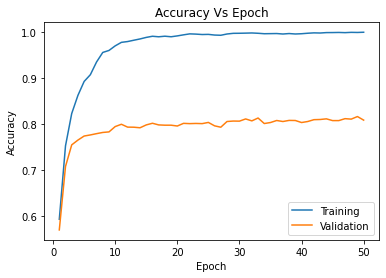

In [ ]:
plt.plot(np.array(epochs),np.array(accs),label = 'Training')
plt.plot(np.array(epochs),np.array(val_accs),label = 'Validation')
plt.xlabel("Epoch") 
plt.ylabel("Accuracy")
plt.title("Accuracy Vs Epoch")
plt.legend()
plt.show()

In [ ]:
total_loss = 0
total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Loss: {:.4f}, Test Accuracy: {:.4f}' .format(total_loss, correct/total))

Test Loss: 16.0107, Test Accuracy: 0.8088


Training only final layer

In [ ]:
model = models.resnet18(pretrained=True, progress=True).to(device)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
for param in model.parameters():
  param.required_grad = False

fc_input_size = model.fc.in_features
model.fc = nn.Sequential(nn.Linear(fc_input_size, 10), nn.Softmax()).to(device)

for param in model.fc.parameters():
  param.requires_grad = True

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

In [ ]:
epochs,losses,accs,val_losses,val_accs = train(num_epochs,model,train_loader,valid_loader)


Epoch [1/50]
 Train Loss: 78.9974, Train Accuracy: 0.6650
 Val Loss: 9.0859, Val Accuracy: 0.6424


Epoch [2/50]
 Train Loss: 73.8691, Train Accuracy: 0.7832
 Val Loss: 8.5850, Val Accuracy: 0.7436


Epoch [3/50]
 Train Loss: 72.5564, Train Accuracy: 0.8126
 Val Loss: 8.5103, Val Accuracy: 0.7578


Epoch [4/50]
 Train Loss: 71.2066, Train Accuracy: 0.8441
 Val Loss: 8.4251, Val Accuracy: 0.7744


Epoch [5/50]
 Train Loss: 70.4752, Train Accuracy: 0.8594
 Val Loss: 8.3973, Val Accuracy: 0.7812


Epoch [6/50]
 Train Loss: 69.9605, Train Accuracy: 0.8715
 Val Loss: 8.3789, Val Accuracy: 0.7844


Epoch [7/50]
 Train Loss: 69.3376, Train Accuracy: 0.8863
 Val Loss: 8.3205, Val Accuracy: 0.7962


Epoch [8/50]
 Train Loss: 69.0457, Train Accuracy: 0.8921
 Val Loss: 8.3107, Val Accuracy: 0.7970


Epoch [9/50]
 Train Loss: 68.9498, Train Accuracy: 0.8945
 Val Loss: 8.3165, Val Accuracy: 0.7970


Epoch [10/50]
 Train Loss: 68.4666, Train Accuracy: 0.9060
 Val Loss: 8.2481, Val Accuracy: 0.8132


In [ ]:
print(losses)
print()
print(accs)
print()
print(val_losses)
print()
print(val_accs)

[78.99737346172333, 73.86909079551697, 72.55643630027771, 71.20658254623413, 70.47517359256744, 69.96045625209808, 69.33759212493896, 69.04565274715424, 68.9497799873352, 68.4665892124176, 68.20359218120575, 67.97057557106018, 67.77965950965881, 67.65752470493317, 67.3986029624939, 67.2342494726181, 67.09613168239594, 66.92629516124725, 66.76900482177734, 66.70358777046204, 66.63792312145233, 66.53549516201019, 66.40715169906616, 66.36349248886108, 66.23905336856842, 66.23062252998352, 66.18300032615662, 66.08344638347626, 66.1818128824234, 66.05906105041504, 66.00976622104645, 65.97245597839355, 65.92057275772095, 65.87590610980988, 65.85906136035919, 65.84624719619751, 65.81471526622772, 65.76897752285004, 65.75437617301941, 65.73348534107208, 65.70363652706146, 65.74507808685303, 65.69900095462799, 65.69401669502258, 65.67092251777649, 65.64298927783966, 65.62517178058624, 65.6624391078949, 65.62848091125488, 65.60175585746765]

[0.6650222222222222, 0.7831777777777778, 0.81262222222

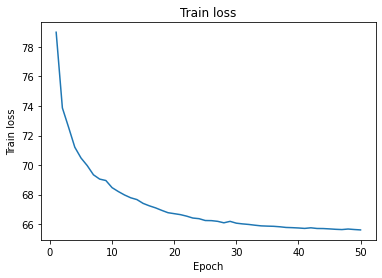

In [ ]:
plt.plot(np.array(epochs), np.array(losses))
plt.xlabel("Epoch") 
plt.ylabel("Train loss")
plt.title("Train loss")
plt.show()

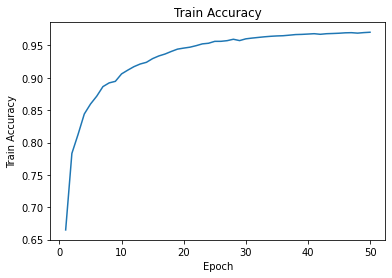

In [ ]:
plt.plot(np.array(epochs), np.array(accs))
plt.xlabel("Epoch") 
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy")
plt.show()

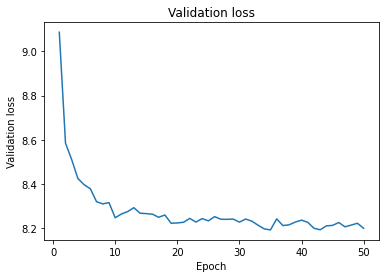

In [ ]:
plt.plot(np.array(epochs), np.array(val_losses))
plt.xlabel("Epoch") 
plt.ylabel("Validation loss")
plt.title("Validation loss")
plt.show()

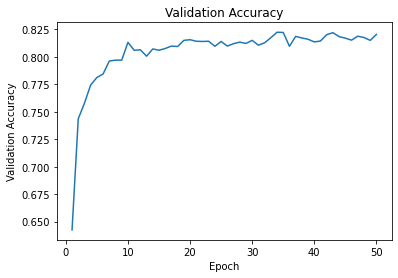

In [ ]:
plt.plot(np.array(epochs), np.array(val_accs))
plt.xlabel("Epoch") 
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy")
plt.show()

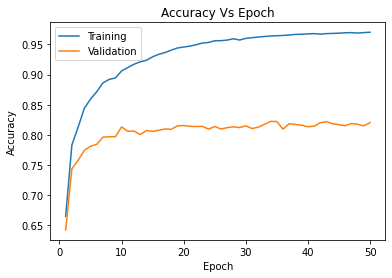

In [ ]:
plt.plot(np.array(epochs),np.array(accs),label = 'Training')
plt.plot(np.array(epochs),np.array(val_accs),label = 'Validation')
plt.xlabel("Epoch") 
plt.ylabel("Accuracy")
plt.title("Accuracy Vs Epoch")
plt.legend()
plt.show()

In [ ]:
total_loss = 0
total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Loss: {:.4f}, Test Accuracy: {:.4f}' .format(total_loss, correct/total))

Test Loss: 16.3729, Test Accuracy: 0.8233


Training 2 layers at the end

In [ ]:
model = models.resnet18(pretrained=True, progress=True).to(device)

In [ ]:
for param in model.parameters():
    param.requires_grad = False

fc_input_size = model.fc.in_features
model.fc = nn.Sequential(nn.Linear(fc_input_size, 512), nn.ReLU(), nn.Linear(512, 10), nn.Softmax()).to(device)

for param in model.fc.parameters():
  param.requires_grad = True

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

In [ ]:
epochs,losses,accs,val_losses,val_accs = train(num_epochs,model,train_loader,valid_loader)


Epoch [1/50]
 Train Loss: 97.3783, Train Accuracy: 0.3092
 Val Loss: 11.0870, Val Accuracy: 0.2980


Epoch [2/50]
 Train Loss: 92.3836, Train Accuracy: 0.3814
 Val Loss: 10.5626, Val Accuracy: 0.3652


Epoch [3/50]
 Train Loss: 90.3856, Train Accuracy: 0.4250
 Val Loss: 10.3349, Val Accuracy: 0.4028


Epoch [4/50]
 Train Loss: 89.2396, Train Accuracy: 0.4473
 Val Loss: 10.2163, Val Accuracy: 0.4246


Epoch [5/50]
 Train Loss: 88.6221, Train Accuracy: 0.4574
 Val Loss: 10.1514, Val Accuracy: 0.4356


Epoch [6/50]
 Train Loss: 88.1264, Train Accuracy: 0.4688
 Val Loss: 10.1165, Val Accuracy: 0.4440


Epoch [7/50]
 Train Loss: 87.8804, Train Accuracy: 0.4717
 Val Loss: 10.1022, Val Accuracy: 0.4398


Epoch [8/50]
 Train Loss: 87.3876, Train Accuracy: 0.4848
 Val Loss: 10.0873, Val Accuracy: 0.4446


Epoch [9/50]
 Train Loss: 87.1265, Train Accuracy: 0.4911
 Val Loss: 10.0481, Val Accuracy: 0.4548


Epoch [10/50]
 Train Loss: 86.8815, Train Accuracy: 0.4958
 Val Loss: 10.0521, Val Accurac

In [ ]:
print(losses)
print()
print(accs)
print()
print(val_losses)
print()
print(val_accs)

[97.37829613685608, 92.38362336158752, 90.38560581207275, 89.23958945274353, 88.6220930814743, 88.12642467021942, 87.88036108016968, 87.38763976097107, 87.12647926807404, 86.88153600692749, 86.93910658359528, 86.67670059204102, 86.55877983570099, 86.149343252182, 86.11430013179779, 86.0407966375351, 85.87943828105927, 85.8075498342514, 85.74564564228058, 85.38212585449219, 85.5873236656189, 85.2251957654953, 85.24921798706055, 85.06559538841248, 85.08230471611023, 84.77964448928833, 84.81394624710083, 84.70886778831482, 84.67669236660004, 84.54558026790619, 84.32918512821198, 84.42682552337646, 83.98858571052551, 83.95441341400146, 84.08107054233551, 83.89590549468994, 83.76814258098602, 83.63304436206818, 83.45172476768494, 83.48279130458832, 83.3556376695633, 83.32266783714294, 83.20267367362976, 83.12299525737762, 82.8749885559082, 82.83045744895935, 82.70237231254578, 82.5669755935669, 82.6039674282074, 82.37529265880585]

[0.3092, 0.3814222222222222, 0.42504444444444445, 0.4472888

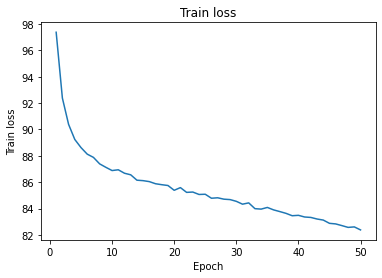

In [ ]:
plt.plot(np.array(epochs), np.array(losses))
plt.xlabel("Epoch") 
plt.ylabel("Train loss")
plt.title("Train loss")
plt.show()

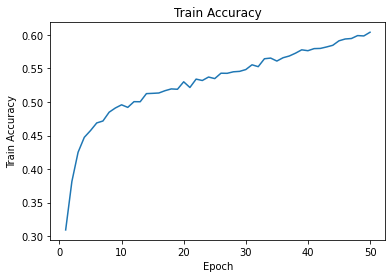

In [ ]:
plt.plot(np.array(epochs), np.array(accs))
plt.xlabel("Epoch") 
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy")
plt.show()

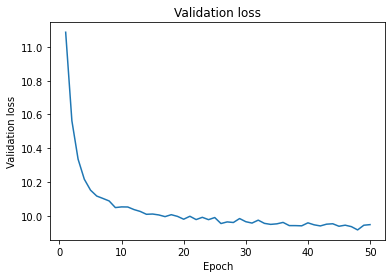

In [ ]:
plt.plot(np.array(epochs), np.array(val_losses))
plt.xlabel("Epoch") 
plt.ylabel("Validation loss")
plt.title("Validation loss")
plt.show()

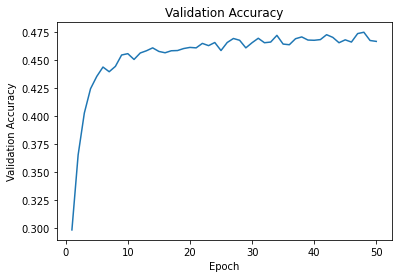

In [ ]:
plt.plot(np.array(epochs), np.array(val_accs))
plt.xlabel("Epoch") 
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy")
plt.show()

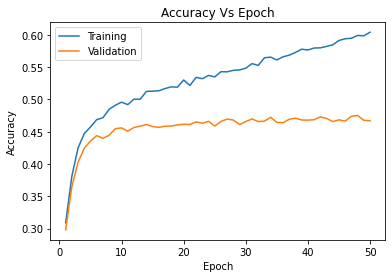

In [ ]:
plt.plot(np.array(epochs),np.array(accs),label = 'Training')
plt.plot(np.array(epochs),np.array(val_accs),label = 'Validation')
plt.xlabel("Epoch") 
plt.ylabel("Accuracy")
plt.title("Accuracy Vs Epoch")
plt.legend()
plt.show()

In [ ]:
total_loss = 0
total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Loss: {:.4f}, Test Accuracy: {:.4f}' .format(total_loss, correct/total))

Test Loss: 19.8504, Test Accuracy: 0.4741


Visualization

Visualization

Files already downloaded and verified


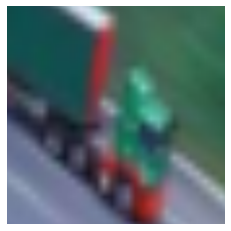

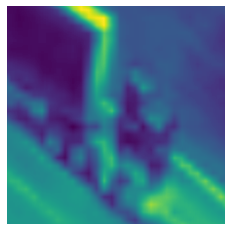

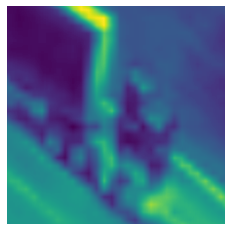

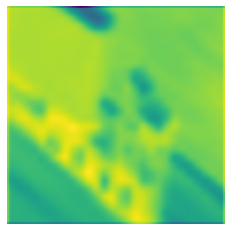

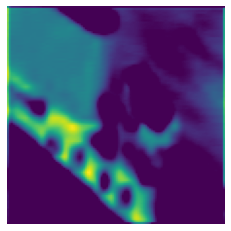

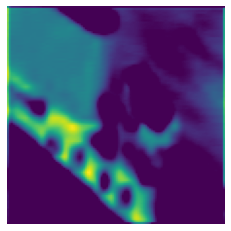

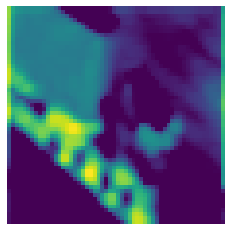

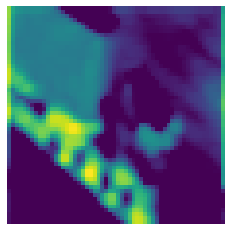

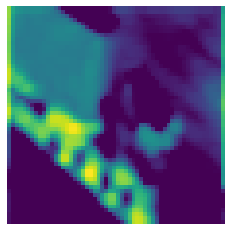

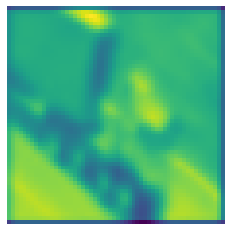

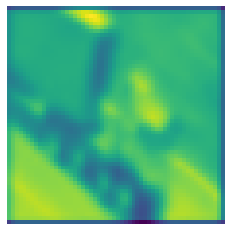

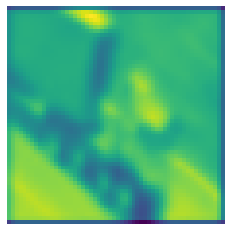

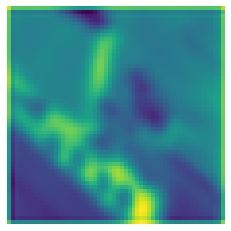

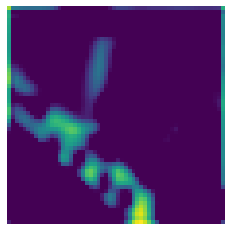

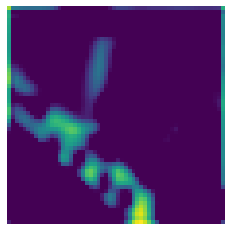

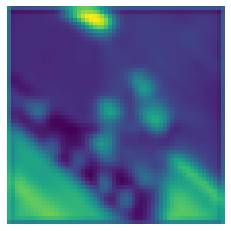

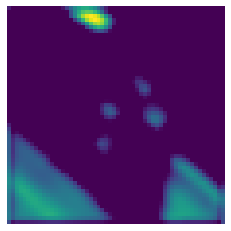

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
data = datasets.CIFAR10('data', train=True, download=True, transform=transform)

# Switch the model to evaluation mode
model.eval()

# Hook to record the output of each layer during forward pass
recorder = torchfunc.hooks.recorders.ForwardPre()
recorder.modules(model)

# Select a random image from the dataset
img, label = data[50]

# Show the image
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.show()

# Preprocess the image and pass it through the model to get the output
img = img.unsqueeze(0)
out = model(img.to(device))

# Specify the layer and image number to visualize
conv_layer = 2
img_number = 0

# Visualize the output of each filter in the selected layer
for i in range(16):
    img = recorder.data[i][img_number].squeeze().to("cpu").detach().numpy()

    # Show the image
    plt.imshow(img[0,:,:])
    plt.axis('off')
    plt.show()

# Tiny CIDAR-10 dataset

In [ ]:
class TinyCifar(Dataset):
    def __init__(self, root, transform=None, train=True, n_images_per_class=500):
        super(TinyCifar, self).__init__()
        self.cifar10 = CIFAR10(root, train=train, download=True)
        self.transform = transform
        self.n_images_per_class = n_images_per_class
        self.n_classes = 10
        self.new2old_indices = self.create_idx_mapping()

    def create_idx_mapping(self):
        label2idx = defaultdict(lambda: deque(maxlen=self.n_images_per_class))
        for original_idx in range(len(self.cifar10)):
            _, label = self.cifar10[original_idx]
            label2idx[label].append(original_idx)

        old_idxs = set(idx for idx_list in label2idx.values() for idx in idx_list)
        new2old_indices = dict(zip(range(len(old_idxs)), sorted(old_idxs)))
        return new2old_indices

    def __len__(self):
        return len(self.new2old_indices)

    def __getitem__(self, index):
        index = self.new2old_indices[index]
        image, label = self.cifar10[index]
        if self.transform:
            image = self.transform(image)
        return image, label

    def get_subset(self, n_samples):
        indices = []
        for label in range(self.n_classes):
            label_indices = [i for i, (_, l) in enumerate(self.cifar10) if l == label]
            indices.extend(random.sample(label_indices, min(n_samples, len(label_indices))))
        return Subset(self, indices)

In [ ]:
train_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_set_combd = torch.stack([im for im, _ in train_set], dim=3)
train_set_mean = train_set_combd.view(3,-1).mean(dim=1)
train_set_std = train_set_combd.view(3,-1).std(dim=1)

Files already downloaded and verified


## Without augmentations

In [ ]:
new_train_data = TinyCifar(root='./data', transform=transforms.ToTensor())
new_test_data = datasets.CIFAR10(root='./data', train=False, download= True, transform=transforms.ToTensor())
new_valid_data = TinyCifar(root='./data', transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
batch_size = 16
valid_size=0.1
seed = 121

In [ ]:
test_loader = DataLoader(new_test_data, batch_size=batch_size,shuffle=True)

num_train = len(new_train_data)
indices = list(range(num_train))
split = int(np.floor(valid_size * num_train))
np.random.seed(seed)
np.random.shuffle(indices)
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = DataLoader(new_train_data, batch_size=batch_size, sampler=train_sampler)
valid_loader = DataLoader(new_valid_data, batch_size=batch_size, sampler=valid_sampler)

In [ ]:
num_classes = 10
num_epochs = 50
learning_rate = 0.05
momentum = 0.9
criterion = nn.CrossEntropyLoss()

In [ ]:
model = models.resnet18(pretrained=False, progress=True).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

In [ ]:
epochs,losses,accs,val_losses,val_accs = train(num_epochs,model,train_loader,valid_loader)

Epoch [1/50], Step [100/282], Loss: 3.4752
Epoch [1/50], Step [200/282], Loss: 2.2708

Epoch [1/50]
 Train Loss: 715.1231, Train Accuracy: 0.1784
 Val Loss: 82.6678, Val Accuracy: 0.1720

Epoch [2/50], Step [100/282], Loss: 1.7071
Epoch [2/50], Step [200/282], Loss: 1.8996

Epoch [2/50]
 Train Loss: 606.8452, Train Accuracy: 0.2229
 Val Loss: 73.0257, Val Accuracy: 0.2160

Epoch [3/50], Step [100/282], Loss: 1.8780
Epoch [3/50], Step [200/282], Loss: 2.2190

Epoch [3/50]
 Train Loss: 550.9535, Train Accuracy: 0.2769
 Val Loss: 64.9618, Val Accuracy: 0.2620

Epoch [4/50], Step [100/282], Loss: 2.0089
Epoch [4/50], Step [200/282], Loss: 2.0794

Epoch [4/50]
 Train Loss: 527.0258, Train Accuracy: 0.3018
 Val Loss: 63.2729, Val Accuracy: 0.2540

Epoch [5/50], Step [100/282], Loss: 1.6199
Epoch [5/50], Step [200/282], Loss: 1.6622

Epoch [5/50]
 Train Loss: 514.4147, Train Accuracy: 0.3409
 Val Loss: 62.0632, Val Accuracy: 0.3120

Epoch [6/50], Step [100/282], Loss: 1.4640
Epoch [6/50], Ste

In [ ]:
print(losses)
print()
print(accs)
print()
print(val_losses)
print()
print(val_accs)

[715.1230796575546, 606.8451509475708, 550.9534871578217, 527.0258042812347, 514.4146559238434, 487.3913836479187, 471.9286686182022, 454.44092857837677, 451.6961464881897, 424.2288194298744, 417.8461321592331, 398.05312287807465, 379.4981871843338, 360.7395433187485, 332.95191836357117, 321.3481541275978, 292.5642122030258, 304.0469925403595, 269.5470953285694, 257.7685064673424, 230.27652296423912, 201.95373153686523, 189.62142761051655, 187.07324227690697, 184.75144739449024, 146.36407704651356, 130.97330889105797, 138.73513174802065, 112.06772206909955, 85.1540686096996, 106.01758402585983, 61.2607780918479, 50.0246771001257, 55.14732677349821, 55.15201917197555, 45.5906215920113, 48.16499586880673, 45.19161092606373, 31.890247610863298, 36.008387576264795, 34.444755707052536, 20.629660191305447, 26.73083577005309, 35.33825299394084, 22.235234660707647, 22.42461587989237, 13.051018721715081, 17.458310936170164, 28.91644834598992, 21.89424186778342]

[0.17844444444444443, 0.22288888

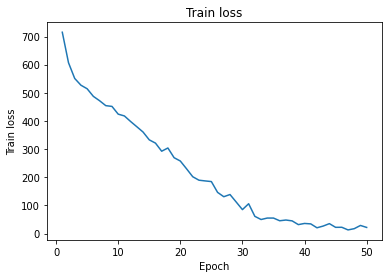

In [ ]:
plt.plot(np.array(epochs), np.array(losses))
plt.xlabel("Epoch") 
plt.ylabel("Train loss")
plt.title("Train loss")
plt.show()

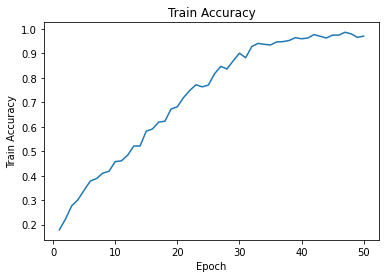

In [ ]:
plt.plot(np.array(epochs), np.array(accs))
plt.xlabel("Epoch") 
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy")
plt.show()

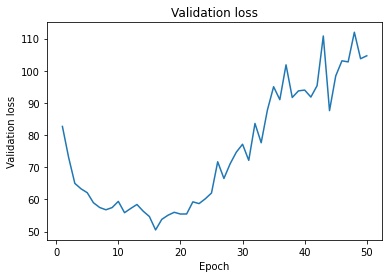

In [ ]:
plt.plot(np.array(epochs), np.array(val_losses))
plt.xlabel("Epoch") 
plt.ylabel("Validation loss")
plt.title("Validation loss")
plt.show()

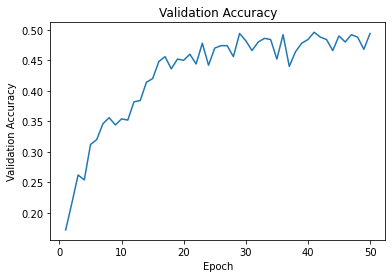

In [ ]:
plt.plot(np.array(epochs), np.array(val_accs))
plt.xlabel("Epoch") 
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy")
plt.show()

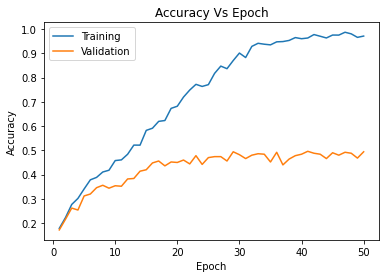

In [ ]:
plt.plot(np.array(epochs),np.array(accs),label = 'Training')
plt.plot(np.array(epochs),np.array(val_accs),label = 'Validation')
plt.xlabel("Epoch") 
plt.ylabel("Accuracy")
plt.title("Accuracy Vs Epoch")
plt.legend()
plt.show()

In [ ]:
total_loss = 0
total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Loss: {:.4f}, Test Accuracy: {:.4f}' .format(total_loss, correct/total))

Test Loss: 2021.2893, Test Accuracy: 0.5046


## With augmentations

In [ ]:
class GaussianBlur(object):
    """Gaussian blur augmentation in SimCLR https://arxiv.org/abs/2002.05709"""

    def __init__(self, sigma=(0.1, 2.0)):
        self.sigma = sigma

    def __call__(self, x):
        sigma = random.uniform(self.sigma[0], self.sigma[1])
        x = x.filter(ImageFilter.GaussianBlur(radius=sigma))
        return x

In [ ]:
trans_train = transforms.Compose([
            transforms.RandomResizedCrop(224, scale=(0.2, 1.)),
            transforms.RandomApply([
                transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)  # not strengthened
            ], p=0.4),
            transforms.RandomGrayscale(p=0.2),
            transforms.RandomApply([GaussianBlur([.1, 2.])], p=0.2),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(train_set_mean,train_set_std)
        ])
trans_val = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(train_set_mean,train_set_std)
        ])
new_train_data = TinyCifar(root='./data', transform=trans_train)
new_test_data = datasets.CIFAR10(root='./data', train=False, download= True, transform=trans_val)
new_valid_data = TinyCifar(root='./data', transform=trans_train)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
batch_size = 16
valid_size=0.1
seed = 121

In [ ]:
test_loader = DataLoader(new_test_data, batch_size=batch_size,shuffle=True)

num_train = len(new_train_data)
indices = list(range(num_train))
split = int(np.floor(valid_size * num_train))
np.random.seed(seed)
np.random.shuffle(indices)
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = DataLoader(new_train_data, batch_size=batch_size, sampler=train_sampler)
valid_loader = DataLoader(new_valid_data, batch_size=batch_size, sampler=valid_sampler)

In [ ]:
num_classes = 10
num_epochs = 50
learning_rate = 0.05
momentum = 0.9
criterion = nn.CrossEntropyLoss()

In [ ]:
model = models.resnet18(pretrained=False, progress=True).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
epochs,losses,accs,val_losses,val_accs = train(num_epochs,model,train_loader,valid_loader)

Epoch [1/50], Step [100/282], Loss: 2.3061
Epoch [1/50], Step [200/282], Loss: 2.3330

Epoch [1/50]
 Train Loss: 659.9473, Train Accuracy: 0.1536
 Val Loss: 74.4765, Val Accuracy: 0.1620

Epoch [2/50], Step [100/282], Loss: 2.1270
Epoch [2/50], Step [200/282], Loss: 2.2745

Epoch [2/50]
 Train Loss: 604.5132, Train Accuracy: 0.1944
 Val Loss: 68.2275, Val Accuracy: 0.1880

Epoch [3/50], Step [100/282], Loss: 2.1177
Epoch [3/50], Step [200/282], Loss: 1.7779

Epoch [3/50]
 Train Loss: 601.1724, Train Accuracy: 0.2040
 Val Loss: 69.2008, Val Accuracy: 0.1820

Epoch [4/50], Step [100/282], Loss: 1.9362
Epoch [4/50], Step [200/282], Loss: 1.6177

Epoch [4/50]
 Train Loss: 540.9663, Train Accuracy: 0.2973
 Val Loss: 63.2321, Val Accuracy: 0.2720

Epoch [5/50], Step [100/282], Loss: 2.2519
Epoch [5/50], Step [200/282], Loss: 2.2685

Epoch [5/50]
 Train Loss: 535.4002, Train Accuracy: 0.2969
 Val Loss: 63.6598, Val Accuracy: 0.2540

Epoch [6/50], Step [100/282], Loss: 1.6260
Epoch [6/50], Ste

In [ ]:
print(losses)
print()
print(accs)
print()
print(val_losses)
print()
print(val_accs)

[659.9472748041153, 604.5131787061691, 601.1724058389664, 540.9662638902664, 535.4002475738525, 540.672621011734, 535.0955104827881, 499.45818996429443, 464.9264612197876, 450.1320379972458, 438.9552375674248, 423.9335370063782, 424.21221566200256, 394.7139393687248, 406.5529001355171, 384.29182583093643, 378.8425163626671, 375.185663998127, 362.9775924086571, 345.77467107772827, 337.5062670111656, 332.79745745658875, 348.4108046889305, 318.9977958202362, 314.6360751390457, 292.0853909254074, 290.880166053772, 302.40176206827164, 286.3523734807968, 281.0844421982765, 280.52686646580696, 273.4097369611263, 259.7760389149189, 261.696567684412, 264.20279863476753, 261.6390658020973, 251.57990381121635, 236.53586822748184, 248.00558051466942, 245.4878282211721, 231.03557428717613, 218.23576593399048, 213.68899050354958, 228.30216243863106, 202.3738660365343, 214.5222074687481, 218.94636251032352, 210.03991374373436, 201.55287417769432, 203.8273117095232]

[0.15355555555555556, 0.1944444444

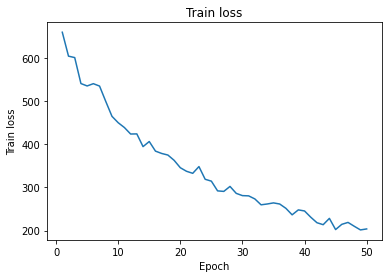

In [ ]:
plt.plot(np.array(epochs), np.array(losses))
plt.xlabel("Epoch") 
plt.ylabel("Train loss")
plt.title("Train loss")
plt.show()

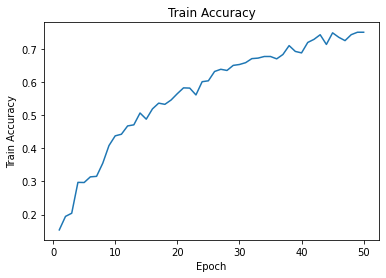

In [ ]:
plt.plot(np.array(epochs), np.array(accs))
plt.xlabel("Epoch") 
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy")
plt.show()

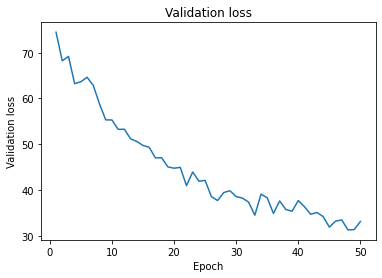

In [ ]:
plt.plot(np.array(epochs), np.array(val_losses))
plt.xlabel("Epoch") 
plt.ylabel("Validation loss")
plt.title("Validation loss")
plt.show()

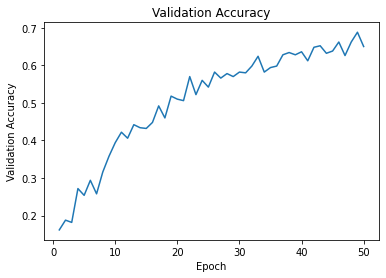

In [ ]:
plt.plot(np.array(epochs), np.array(val_accs))
plt.xlabel("Epoch") 
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy")
plt.show()

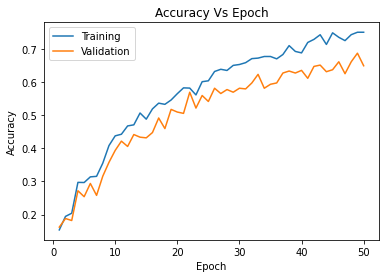

In [ ]:
plt.plot(np.array(epochs),np.array(accs),label = 'Training')
plt.plot(np.array(epochs),np.array(val_accs),label = 'Validation')
plt.xlabel("Epoch") 
plt.ylabel("Accuracy")
plt.title("Accuracy Vs Epoch")
plt.legend()
plt.show()

In [ ]:
total_loss = 0
total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Loss: {:.4f}, Test Accuracy: {:.4f}' .format(total_loss, correct/total))

Test Loss: 500.3157, Test Accuracy: 0.7343


## With Dropout

Dropout = 0.5

In [ ]:
p_dropout = 0.5

In [ ]:
class GaussianBlur(object):
    """Gaussian blur augmentation in SimCLR https://arxiv.org/abs/2002.05709"""

    def __init__(self, sigma=(0.1, 2.0)):
        self.sigma = sigma

    def __call__(self, x):
        sigma = random.uniform(self.sigma[0], self.sigma[1])
        x = x.filter(ImageFilter.GaussianBlur(radius=sigma))
        return x

In [ ]:
trans_train = transforms.Compose([
            transforms.RandomResizedCrop(224, scale=(0.2, 1.)),
            transforms.RandomApply([
                transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)  # not strengthened
            ], p=0.4),
            transforms.RandomGrayscale(p=0.2),
            transforms.RandomApply([GaussianBlur([.1, 2.])], p=0.2),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(train_set_mean,train_set_std)
        ])
trans_val = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(train_set_mean,train_set_std)
        ])
new_train_data = TinyCifar(root='./data', transform=trans_train)
new_test_data = datasets.CIFAR10(root='./data', train=False, download= True, transform=trans_val)
new_valid_data = TinyCifar(root='./data', transform=trans_train)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
batch_size = 16
valid_size=0.1
seed = 121

In [ ]:
test_loader = DataLoader(new_test_data, batch_size=batch_size,shuffle=True)

num_train = len(new_train_data)
indices = list(range(num_train))
split = int(np.floor(valid_size * num_train))
np.random.seed(seed)
np.random.shuffle(indices)
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = DataLoader(new_train_data, batch_size=batch_size, sampler=train_sampler)
valid_loader = DataLoader(new_valid_data, batch_size=batch_size, sampler=valid_sampler)

In [ ]:
num_classes = 10
num_epochs = 50
learning_rate = 0.05
momentum = 0.9
criterion = nn.CrossEntropyLoss()

In [ ]:
model = models.resnet18(pretrained=False, progress=True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
model.layer2 = nn.Sequential(
    model.layer2,
    nn.Dropout2d(p=p_dropout)
)

model.layer4 = nn.Sequential(
    model.layer4,
    nn.Dropout2d(p=p_dropout)
)

In [ ]:
model = model.to(device)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

In [ ]:
epochs,losses,accs,val_losses,val_accs = train(num_epochs,model,train_loader,valid_loader)

Epoch [1/50], Step [100/282], Loss: 3.9458
Epoch [1/50], Step [200/282], Loss: 3.2291

Epoch [1/50]
 Train Loss: 689.7232, Train Accuracy: 0.1458
 Val Loss: 79.1935, Val Accuracy: 0.1420

Epoch [2/50], Step [100/282], Loss: 2.3047
Epoch [2/50], Step [200/282], Loss: 2.3236

Epoch [2/50]
 Train Loss: 673.2359, Train Accuracy: 0.1589
 Val Loss: 75.8971, Val Accuracy: 0.1680

Epoch [3/50], Step [100/282], Loss: 2.2461
Epoch [3/50], Step [200/282], Loss: 2.2793

Epoch [3/50]
 Train Loss: 632.7216, Train Accuracy: 0.1716
 Val Loss: 74.5239, Val Accuracy: 0.1540

Epoch [4/50], Step [100/282], Loss: 2.1616
Epoch [4/50], Step [200/282], Loss: 2.6499

Epoch [4/50]
 Train Loss: 619.6310, Train Accuracy: 0.1902
 Val Loss: 71.4081, Val Accuracy: 0.1400

Epoch [5/50], Step [100/282], Loss: 2.2439
Epoch [5/50], Step [200/282], Loss: 2.0704

Epoch [5/50]
 Train Loss: 616.7548, Train Accuracy: 0.1922
 Val Loss: 69.5276, Val Accuracy: 0.1880

Epoch [6/50], Step [100/282], Loss: 1.8558
Epoch [6/50], Ste

In [ ]:
print(losses)
print()
print(accs)
print()
print(val_losses)
print()
print(val_accs)

[689.7232484817505, 673.2358636856079, 632.721561551094, 619.6310136318207, 616.7547779083252, 585.4391429424286, 570.3865375518799, 588.6884660720825, 566.2833083868027, 552.0148409605026, 557.7593562602997, 558.9402453899384, 548.2270543575287, 541.3116729259491, 532.1136956214905, 531.9985666275024, 530.8638010025024, 518.9970586299896, 508.85477089881897, 519.5276935100555, 504.16851580142975, 491.70635282993317, 491.82975256443024, 488.8504592180252, 486.3786417245865, 466.9064483642578, 473.3281854391098, 466.4475410580635, 471.973469376564, 450.87253081798553, 454.5344849228859, 451.9778571128845, 450.9966138601303, 438.3674810528755, 440.7844724059105, 428.8036853671074, 417.3683043718338, 415.02858167886734, 404.6880597472191, 413.24807780981064, 399.2470544576645, 406.08322072029114, 398.69150763750076, 398.41024965047836, 403.66556948423386, 387.4054203033447, 388.97465336322784, 396.3379439711571, 374.0681074857712, 367.07678002119064]

[0.14577777777777778, 0.1588888888888

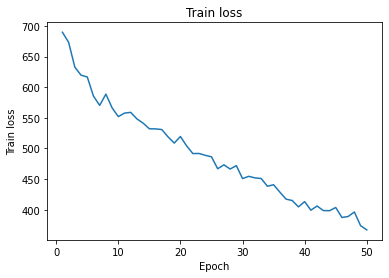

In [ ]:
plt.plot(np.array(epochs), np.array(losses))
plt.xlabel("Epoch") 
plt.ylabel("Train loss")
plt.title("Train loss")
plt.show()

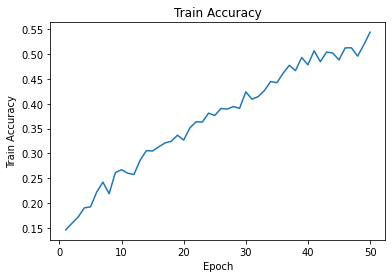

In [ ]:
plt.plot(np.array(epochs), np.array(accs))
plt.xlabel("Epoch") 
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy")
plt.show()

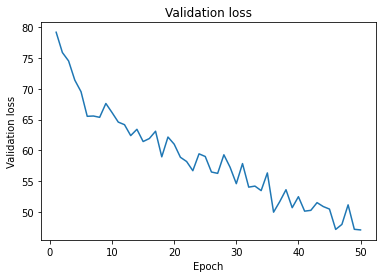

In [ ]:
plt.plot(np.array(epochs), np.array(val_losses))
plt.xlabel("Epoch") 
plt.ylabel("Validation loss")
plt.title("Validation loss")
plt.show()

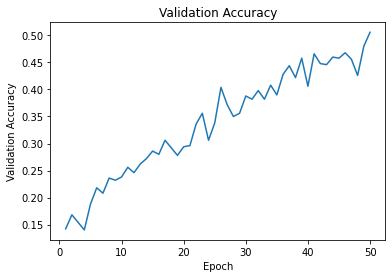

In [ ]:
plt.plot(np.array(epochs), np.array(val_accs))
plt.xlabel("Epoch") 
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy")
plt.show()

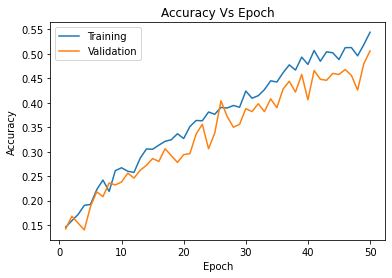

In [ ]:
plt.plot(np.array(epochs),np.array(accs),label = 'Training')
plt.plot(np.array(epochs),np.array(val_accs),label = 'Validation')
plt.xlabel("Epoch") 
plt.ylabel("Accuracy")
plt.title("Accuracy Vs Epoch")
plt.legend()
plt.show()

In [ ]:
total_loss = 0
total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Loss: {:.4f}, Test Accuracy: {:.4f}' .format(total_loss, correct/total))

Test Loss: 751.2797, Test Accuracy: 0.5816


Dropout = 0.8

In [ ]:
p_dropout = 0.8

In [ ]:
class GaussianBlur(object):
    """Gaussian blur augmentation in SimCLR https://arxiv.org/abs/2002.05709"""

    def __init__(self, sigma=(0.1, 2.0)):
        self.sigma = sigma

    def __call__(self, x):
        sigma = random.uniform(self.sigma[0], self.sigma[1])
        x = x.filter(ImageFilter.GaussianBlur(radius=sigma))
        return x

In [ ]:
trans_train = transforms.Compose([
            transforms.RandomResizedCrop(224, scale=(0.2, 1.)),
            transforms.RandomApply([
                transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)  # not strengthened
            ], p=0.4),
            transforms.RandomGrayscale(p=0.2),
            transforms.RandomApply([GaussianBlur([.1, 2.])], p=0.2),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(train_set_mean,train_set_std)
        ])
trans_val = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(train_set_mean,train_set_std)
        ])
new_train_data = TinyCifar(root='./data', transform=trans_train)
new_test_data = datasets.CIFAR10(root='./data', train=False, download= True, transform=trans_val)
new_valid_data = TinyCifar(root='./data', transform=trans_train)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
batch_size = 16
valid_size=0.1
seed = 121

In [ ]:
test_loader = DataLoader(new_test_data, batch_size=batch_size,shuffle=True)

num_train = len(new_train_data)
indices = list(range(num_train))
split = int(np.floor(valid_size * num_train))
np.random.seed(seed)
np.random.shuffle(indices)
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = DataLoader(new_train_data, batch_size=batch_size, sampler=train_sampler)
valid_loader = DataLoader(new_valid_data, batch_size=batch_size, sampler=valid_sampler)

In [ ]:
num_classes = 10
num_epochs = 50
learning_rate = 0.05
momentum = 0.9
criterion = nn.CrossEntropyLoss()

In [ ]:
model = models.resnet18(pretrained=False, progress=True)

In [ ]:
model.layer2 = nn.Sequential(
    model.layer2,
    nn.Dropout2d(p=p_dropout)
)

model.layer4 = nn.Sequential(
    model.layer4,
    nn.Dropout2d(p=p_dropout)
)

In [ ]:
model = model.to(device)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

In [ ]:
epochs,losses,accs,val_losses,val_accs = train(num_epochs,model,train_loader,valid_loader)

Epoch [1/50], Step [100/282], Loss: 6.4245
Epoch [1/50], Step [200/282], Loss: 5.5444

Epoch [1/50]
 Train Loss: 765.2803, Train Accuracy: 0.1029
 Val Loss: 86.5047, Val Accuracy: 0.0980

Epoch [2/50], Step [100/282], Loss: 2.6384
Epoch [2/50], Step [200/282], Loss: 2.4721

Epoch [2/50]
 Train Loss: 700.1510, Train Accuracy: 0.1060
 Val Loss: 80.5717, Val Accuracy: 0.0940

Epoch [3/50], Step [100/282], Loss: 2.3582
Epoch [3/50], Step [200/282], Loss: 2.4208

Epoch [3/50]
 Train Loss: 687.0977, Train Accuracy: 0.1011
 Val Loss: 79.7199, Val Accuracy: 0.1180

Epoch [4/50], Step [100/282], Loss: 2.5634
Epoch [4/50], Step [200/282], Loss: 2.4070

Epoch [4/50]
 Train Loss: 682.1233, Train Accuracy: 0.1173
 Val Loss: 78.3959, Val Accuracy: 0.1080

Epoch [5/50], Step [100/282], Loss: 2.5460
Epoch [5/50], Step [200/282], Loss: 2.6093

Epoch [5/50]
 Train Loss: 661.5687, Train Accuracy: 0.1320
 Val Loss: 76.1372, Val Accuracy: 0.1140

Epoch [6/50], Step [100/282], Loss: 2.4325
Epoch [6/50], Ste

In [ ]:
print(losses)
print()
print(accs)
print()
print(val_losses)
print()
print(val_accs)

[765.2802810668945, 700.1510217189789, 687.0976984500885, 682.1233401298523, 661.5687322616577, 657.7428579330444, 642.3925478458405, 647.9992463588715, 640.5784275531769, 637.0271377563477, 637.0130999088287, 627.6296788454056, 629.9202401638031, 621.3252567052841, 626.6555542945862, 620.9798631668091, 616.0288344621658, 616.2756636142731, 618.0708394050598, 609.2058591842651, 604.3668594360352, 605.385537147522, 606.4985427856445, 602.3672021627426, 602.8882313966751, 594.1194089651108, 593.1503040790558, 599.675134062767, 592.6078565120697, 583.280032157898, 597.2572671175003, 587.8016678094864, 586.3959048986435, 588.9262725114822, 586.6602379083633, 590.8345905542374, 583.027135014534, 574.9471077919006, 580.2025516033173, 579.9748725891113, 570.5010595321655, 578.7620017528534, 571.8646173477173, 572.1860077381134, 575.3290143013, 564.8439259529114, 567.499409198761, 572.6704722642899, 569.1355608701706, 566.1638758182526]

[0.10288888888888889, 0.106, 0.10111111111111111, 0.1173

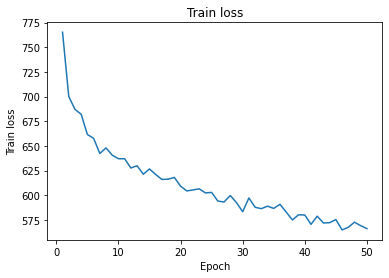

In [ ]:
plt.plot(np.array(epochs), np.array(losses))
plt.xlabel("Epoch") 
plt.ylabel("Train loss")
plt.title("Train loss")
plt.show()

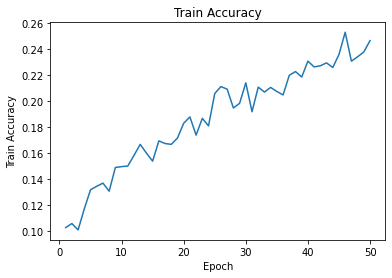

In [ ]:
plt.plot(np.array(epochs), np.array(accs))
plt.xlabel("Epoch") 
plt.ylabel("Train Accuracy")
plt.title("Train Accuracy")
plt.show()

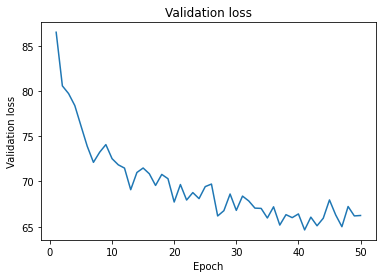

In [ ]:
plt.plot(np.array(epochs), np.array(val_losses))
plt.xlabel("Epoch") 
plt.ylabel("Validation loss")
plt.title("Validation loss")
plt.show()

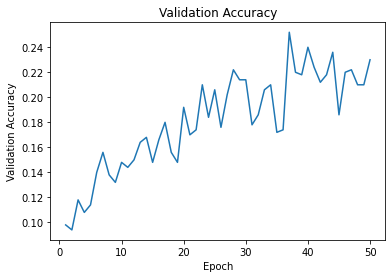

In [ ]:
plt.plot(np.array(epochs), np.array(val_accs))
plt.xlabel("Epoch") 
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy")
plt.show()

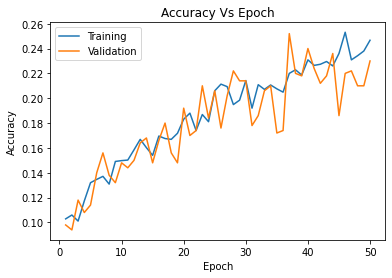

In [ ]:
plt.plot(np.array(epochs),np.array(accs),label = 'Training')
plt.plot(np.array(epochs),np.array(val_accs),label = 'Validation')
plt.xlabel("Epoch") 
plt.ylabel("Accuracy")
plt.title("Accuracy Vs Epoch")
plt.legend()
plt.show()

In [ ]:
total_loss = 0
total = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Loss: {:.4f}, Test Accuracy: {:.4f}' .format(total_loss, correct/total))

Test Loss: 1201.1090, Test Accuracy: 0.2751


Visualization

Files already downloaded and verified


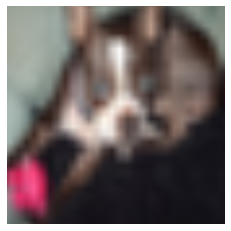

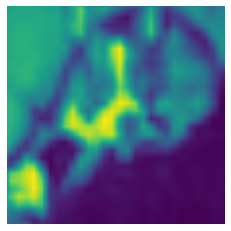

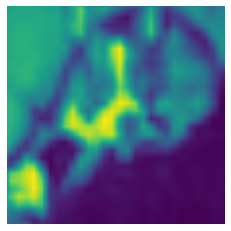

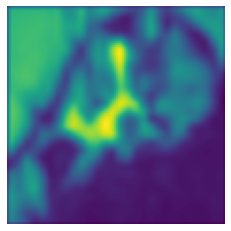

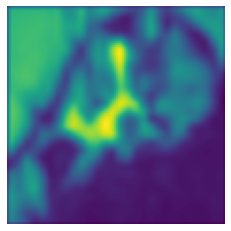

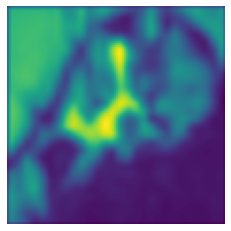

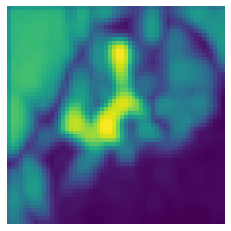

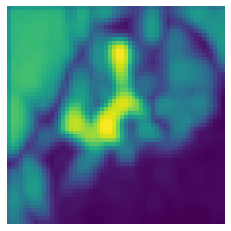

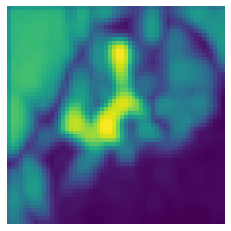

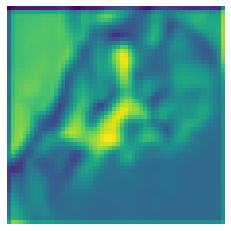

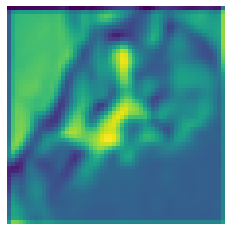

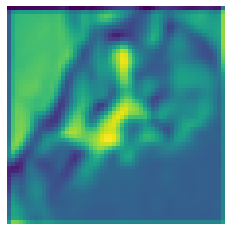

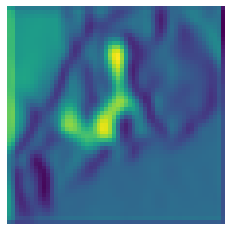

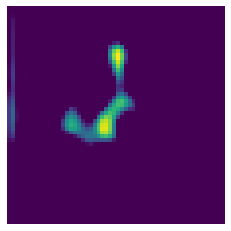

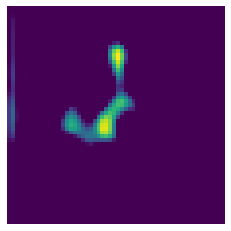

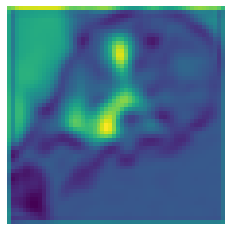

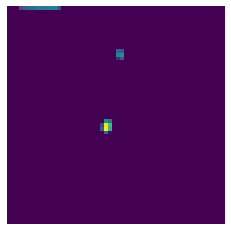

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
data = datasets.CIFAR10('data', train=True, download=True, transform=transform)

# Switch the model to evaluation mode
model.eval()

# Hook to record the output of each layer during forward pass
recorder = torchfunc.hooks.recorders.ForwardPre()
recorder.modules(model)

# Select a random image from the dataset
img, label = data[450]

# Show the image
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.show()

# Preprocess the image and pass it through the model to get the output
img = img.unsqueeze(0)
out = model(img.to(device))

# Specify the layer and image number to visualize
conv_layer = 2
img_number = 0

# Visualize the output of each filter in the selected layer
for i in range(16):
    img = recorder.data[i][img_number].squeeze().to("cpu").detach().numpy()

    # Show the image
    plt.imshow(img[0,:,:])
    plt.axis('off')
    plt.show()